# Projeto 02: Realce de imagens usando usando o Laplaciano e Filtragem Espacial

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
lua = cv2.imread('drive/MyDrive/PDI/assets/Fig0338(a)(blurry_moon).tif', cv2.IMREAD_GRAYSCALE)
caracteres = cv2.imread('drive/MyDrive/PDI/assets/Fig0333(a)(test_pattern_blurring_orig).tif', cv2.IMREAD_GRAYSCALE)
graos = cv2.imread('drive/MyDrive/PDI/assets/Fig0320(1)(top_left).tif', cv2.IMREAD_GRAYSCALE)
dolar = cv2.imread('drive/MyDrive/PDI/assets/Fig0314(a)(100-dollars).tif', cv2.IMREAD_GRAYSCALE)
rim = cv2.imread('drive/MyDrive/PDI/assets/Fig0312(a)(kidney).tif', cv2.IMREAD_GRAYSCALE)

## Laplaciano para realce

$\nabla^2f = \frac{\delta^2f}{\delta x^2} + \frac{\delta^2f}{\delta y^2}$

$\nabla^2f = f(x + 1, y) + f(x - 1, y) + f(x, y + 1) + f(x, y - 1) - 4f(x, y)$

$g(x, y) = f(x, y) + c \left[ \nabla^2f(x, y) \right]$

In [ ]:
def laplacian(imagem):
    kernel = np.array([[0, 1, 0],
                      [1, -4, 1],
                      [0, 1, 0]], dtype=np.float32)
    # kernel = np.array([[1, 1, 1],
    #                   [1, -8, 1],
    #                   [1, 1, 1]], dtype=np.float32)

    altura, largura = imagem.shape

    _laplaciano = np.zeros_like(imagem, dtype=np.float32)

    # Aplicar a convolução manualmente (ignorando bordas)
    for i in range(1, altura - 1):
        for j in range(1, largura - 1):
            roi = imagem[i - 1:i + 2, j - 1:j + 2]

            valor = np.sum(roi * kernel)
            _laplaciano[i, j] = valor

    return _laplaciano

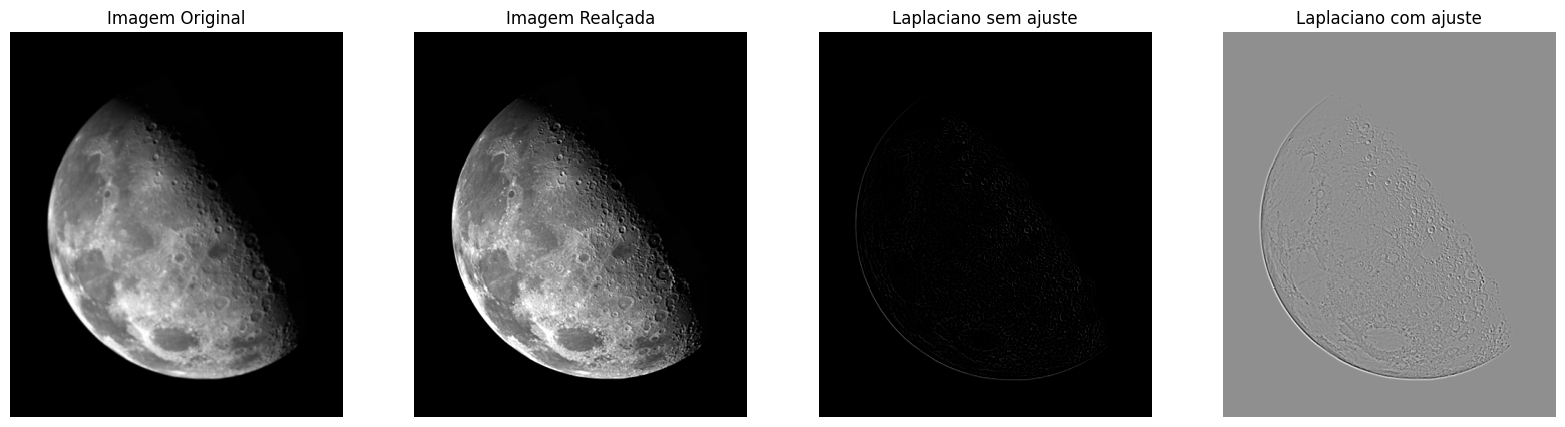

True

In [ ]:
laplaciano = laplacian(lua)
# laplaciano = np.abs(laplaciano)
laplaciano_ajustado = ((laplaciano - laplaciano.min()) / (laplaciano.max() - laplaciano.min()) * 255).astype(np.uint8)
c = -1
imagem_realcada = np.clip(lua + c*laplaciano, 0, 255).astype(np.uint8)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(lua, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Imagem Original')
axes[0].axis('off')
axes[1].imshow(imagem_realcada, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Imagem Realçada')
axes[1].axis('off')
axes[2].imshow(laplaciano, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('Laplaciano sem ajuste')
axes[2].axis('off')
axes[3].imshow(laplaciano_ajustado, cmap='gray', vmin=0, vmax=255)
axes[3].set_title('Laplaciano com ajuste')
axes[3].axis('off')
plt.show()

cv2.imwrite("lua.jpg", lua)
cv2.imwrite("lua_realcada.jpg", imagem_realcada)
cv2.imwrite("laplaciano.jpg", laplaciano)
cv2.imwrite("laplaciano_ajustado.jpg", laplaciano_ajustado)

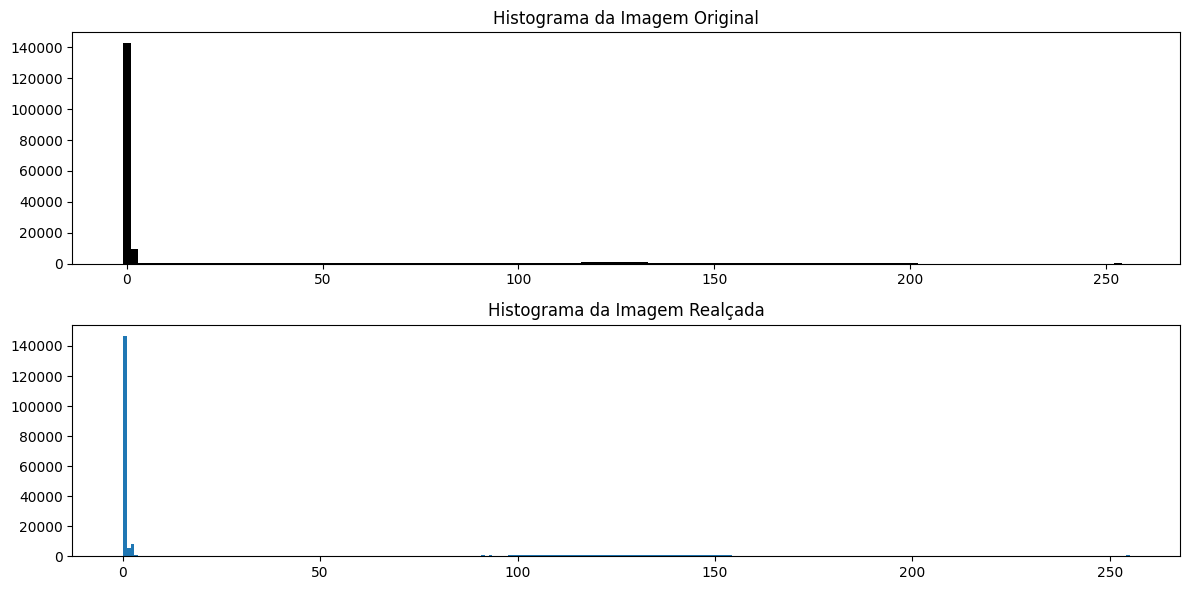

In [ ]:
plt.figure(figsize=(12, 6))

hist_original = cv2.calcHist([lua], [0], None, [256], [0, 256])
plt.subplot(2, 1, 1)
plt.bar(range(256), hist_original.flatten(), width=2, color='black')
plt.title('Histograma da Imagem Original')

hist_realcada = cv2.calcHist([imagem_realcada], [0], None, [256], [0, 256])
plt.subplot(2, 1, 2)
plt.hist(imagem_realcada.ravel(), bins=256)
plt.title('Histograma da Imagem Realçada')

plt.tight_layout()
plt.show()

### Testando em outras imagens

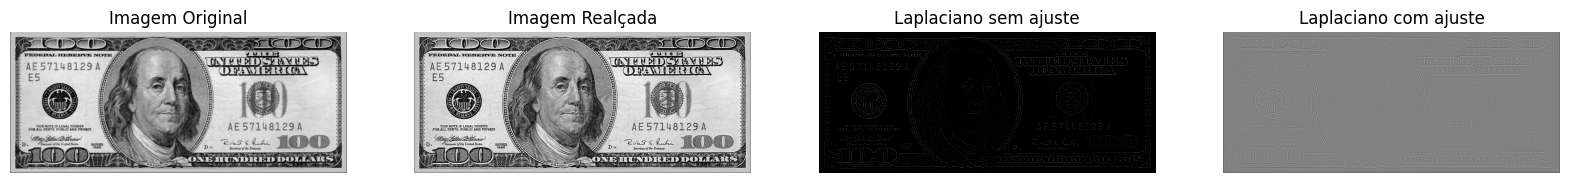

True

In [ ]:
laplaciano = laplacian(dolar)
# laplaciano = np.abs(laplaciano)
laplaciano_ajustado = ((laplaciano - laplaciano.min()) / (laplaciano.max() - laplaciano.min()) * 255).astype(np.uint8)
c = -1
imagem_realcada = np.clip(dolar + c*laplaciano, 0, 255).astype(np.uint8)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(dolar, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Imagem Original')
axes[0].axis('off')
axes[1].imshow(imagem_realcada, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Imagem Realçada')
axes[1].axis('off')
axes[2].imshow(laplaciano, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('Laplaciano sem ajuste')
axes[2].axis('off')
axes[3].imshow(laplaciano_ajustado, cmap='gray', vmin=0, vmax=255)
axes[3].set_title('Laplaciano com ajuste')
axes[3].axis('off')
plt.show()

cv2.imwrite("dolar.jpg", dolar)
cv2.imwrite("dolar_realcado.jpg", imagem_realcada)

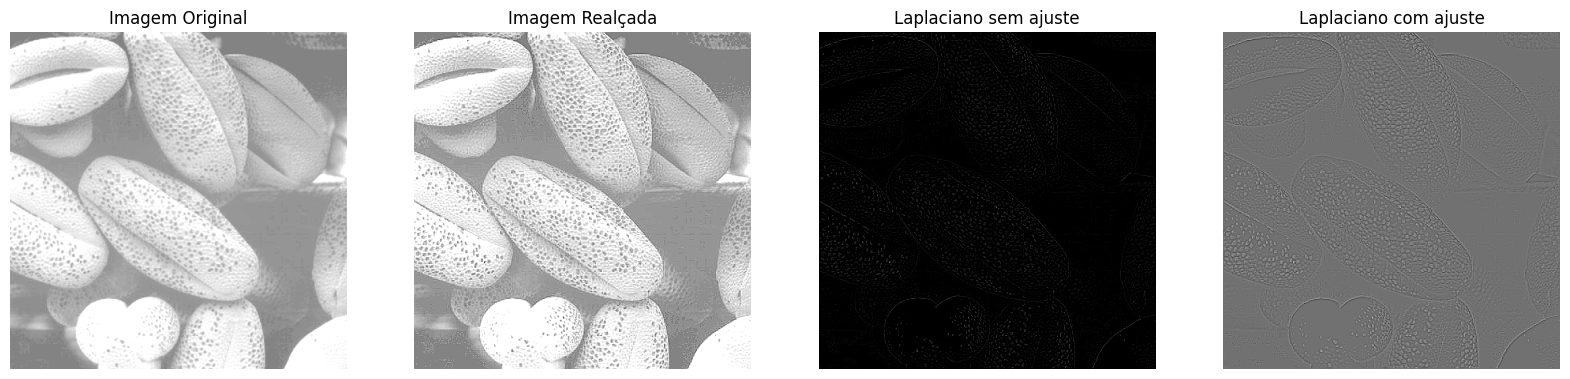

True

In [ ]:
laplaciano = laplacian(graos)
# laplaciano = np.abs(laplaciano)
laplaciano_ajustado = ((laplaciano - laplaciano.min()) / (laplaciano.max() - laplaciano.min()) * 255).astype(np.uint8)
c = -1
imagem_realcada = np.clip(graos + c*laplaciano, 0, 255).astype(np.uint8)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(graos, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Imagem Original')
axes[0].axis('off')
axes[1].imshow(imagem_realcada, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Imagem Realçada')
axes[1].axis('off')
axes[2].imshow(laplaciano, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('Laplaciano sem ajuste')
axes[2].axis('off')
axes[3].imshow(laplaciano_ajustado, cmap='gray', vmin=0, vmax=255)
axes[3].set_title('Laplaciano com ajuste')
axes[3].axis('off')
plt.show()

cv2.imwrite("graos.jpg", graos)
cv2.imwrite("graos_realcado.jpg", imagem_realcada)

## Filtragem high-boost

1. Borrar a imagem original.
2. Subtrair a imagem borrada da original. (= máscara)
3. Adicionar a máscara à imagem original.

$g_{máscara}(x, y) = f(x, y) - \bar{f}$

$g(x, y) = f(x, y) + k*g_{máscara}(x, y)$

In [3]:
def filtro_media(imagem, m):
    if m % 2 == 0:
        m += 1

    kernel = np.ones((m, m), dtype=np.float32) / (m * m)
    altura, largura = imagem.shape

    pad = m // 2
    imagem_padded = np.pad(imagem, pad, mode='constant', constant_values=0)
    imagem_filtrada = np.zeros_like(imagem, dtype=np.float32)

    for i in range(altura):
        for j in range(largura):
            # Extrair a janela (m x m) ao redor do pixel (i, j)
            janela = imagem_padded[i:i + m, j:j + m]
            media = np.sum(janela * kernel)
            imagem_filtrada[i, j] = media

    return np.clip(imagem_filtrada, 0, 255).astype(np.uint8)

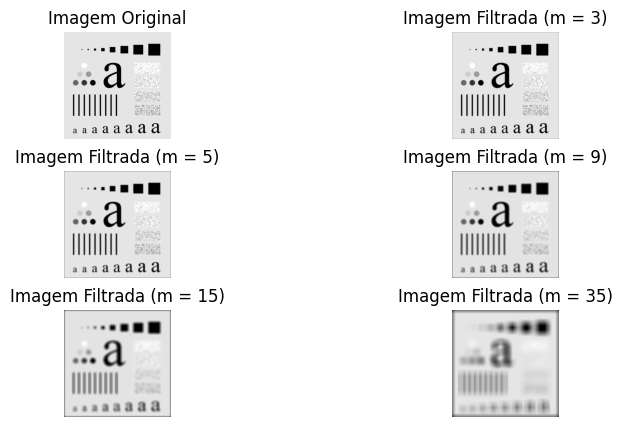

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 5))
axes = axes.flatten()

axes[0].imshow(caracteres, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Imagem Original')
axes[0].axis('off')

for i, m in enumerate([3, 5, 9, 15, 35]):
    imagem_filtrada = filtro_media(caracteres, m)
    axes[i + 1].imshow(imagem_filtrada, cmap='gray', vmin=0, vmax=255)
    axes[i + 1].set_title(f'Imagem Filtrada (m = {m})')
    axes[i + 1].axis('off')

plt.subplots_adjust(wspace=0, hspace=0.3)
plt.show()

fig.savefig("caracteres_filtro_media.jpg")

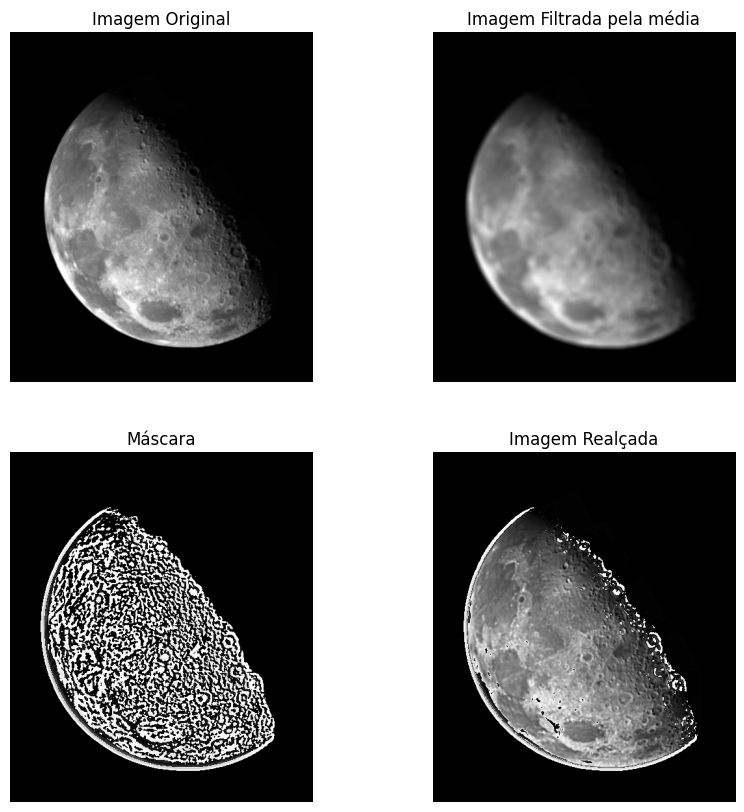

True

In [ ]:
filtrada = filtro_media(lua, 9)
mascara = lua - filtrada
k = 1
imagem_realcada = np.clip(lua + k*mascara, 0, 255).astype(np.uint8)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

axes[0].imshow(lua, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Imagem Original')
axes[0].axis('off')

axes[1].imshow(filtrada, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Imagem Filtrada pela média')
axes[1].axis('off')

axes[2].imshow(mascara, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('Máscara')
axes[2].axis('off')

axes[3].imshow(imagem_realcada, cmap='gray', vmin=0, vmax=255)
axes[3].set_title('Imagem Realçada')
axes[3].axis('off')
plt.show()

cv2.imwrite("lua_filtrada_media.jpg", filtrada)
cv2.imwrite("mascara_high_boost.jpg", mascara)
cv2.imwrite("lua_high_boost.jpg", imagem_realcada)

### Testando em outras imagens

In [4]:
tmp = cv2.imread('drive/MyDrive/PDI/assets/Fig0326(a)(embedded_square_noisy_512).tif', cv2.IMREAD_GRAYSCALE)
cv2.imwrite("simbolos.jpg", tmp)

True

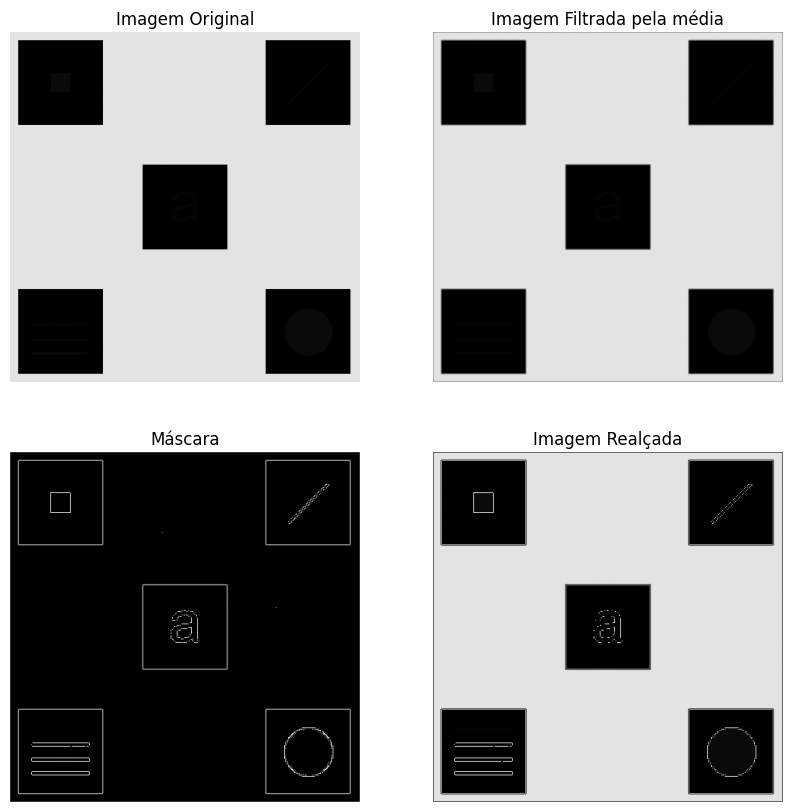

True

In [8]:
filtrada = filtro_media(tmp, 3)
mascara = tmp - filtrada
k = 1
imagem_realcada = np.clip(tmp + k*mascara, 0, 255).astype(np.uint8)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

axes[0].imshow(tmp, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Imagem Original')
axes[0].axis('off')

axes[1].imshow(filtrada, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Imagem Filtrada pela média')
axes[1].axis('off')

axes[2].imshow(mascara, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('Máscara')
axes[2].axis('off')

axes[3].imshow(imagem_realcada, cmap='gray', vmin=0, vmax=255)
axes[3].set_title('Imagem Realçada')
axes[3].axis('off')

plt.show()

cv2.imwrite("dolar_mascara_hb.jpg", mascara)
cv2.imwrite("dolar_high_boost.jpg", imagem_realcada)

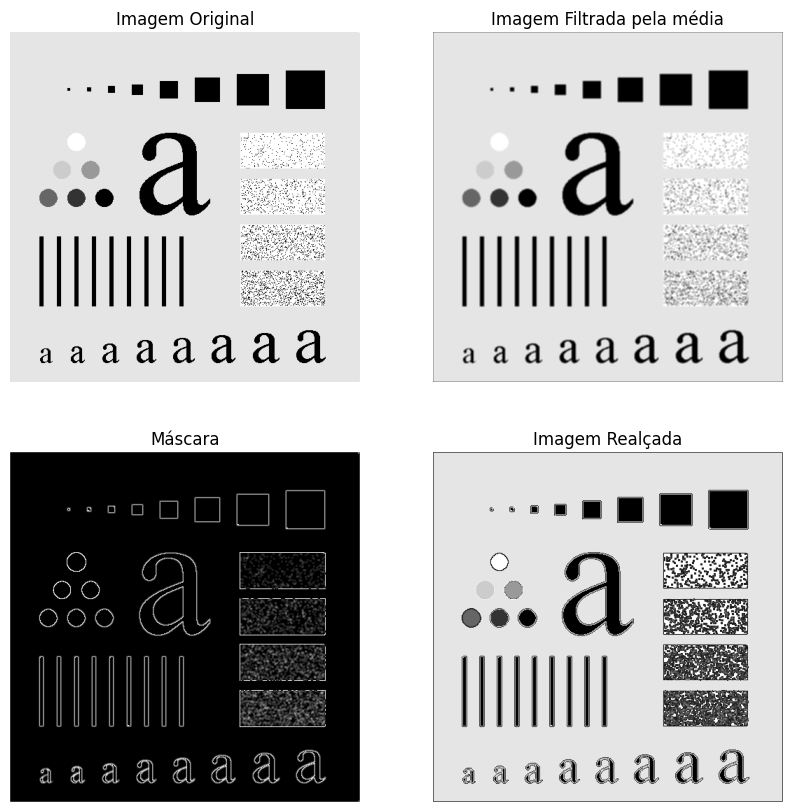

True

In [ ]:
filtrada = filtro_media(caracteres, 3)
mascara = caracteres - filtrada
k = 1
imagem_realcada = np.clip(caracteres + k*mascara, 0, 255).astype(np.uint8)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

axes[0].imshow(caracteres, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Imagem Original')
axes[0].axis('off')

axes[1].imshow(filtrada, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Imagem Filtrada pela média')
axes[1].axis('off')

axes[2].imshow(mascara, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('Máscara')
axes[2].axis('off')

axes[3].imshow(imagem_realcada, cmap='gray', vmin=0, vmax=255)
axes[3].set_title('Imagem Realçada')
axes[3].axis('off')

plt.show()

cv2.imwrite("caracteres_mascara_hb.jpg", mascara)
cv2.imwrite("caracteres_high_boost.jpg", imagem_realcada)